In [1]:
import matplotlib.pyplot as plt  # plotting library
import numpy as np  # numerical library
import xarray as xr  # netCDF library
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list
import cftime
import pandas as pd

# Some defaults:
plt.rcParams['figure.figsize'] = (12, 5)  # Default plot size

In [2]:
#To compute de climatoloy
yearC1='2004'
yearC2='2014'

## Read the data

In [3]:
RG=xr.open_dataset('RG_Global_Jan2004_Dic2023.nc')

In [4]:
RG_temp=RG.temperature.sel(lat=slice( -60, 60))
RG_salt=RG.salinity.sel(lat=slice( -60, 60))

## Seasonal cycle
Create seasonal climatology from 1982 to 1992 and the asociated anomaly

In [5]:
#Create monthly climatology
RG_temp_clim = RG_temp.sel(time=slice(yearC1,yearC2)).groupby('time.month').mean(dim='time').load();
RG_salt_clim = RG_salt.sel(time=slice(yearC1,yearC2)).groupby('time.month').mean(dim='time').load();

#Create anomaly
RG_temp_anom = RG_temp.groupby('time.month') - RG_temp_clim
RG_temp_anom.load();

RG_salt_anom = RG_salt.groupby('time.month') - RG_salt_clim
RG_salt_anom.load();

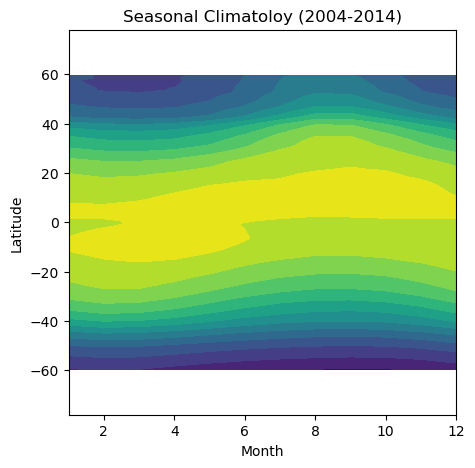

In [6]:
fig, ax = plt.subplots(1, 1 , figsize=(5,5))
ax.contourf(RG_temp_clim.mean(dim='lon').sel(pre=10).month,
                 RG_temp_clim.mean(dim='lon').sel(pre=10).lat,
                 RG_temp_clim.mean(dim='lon').sel(pre=10).transpose(),levels=12, vmin=-2, vmax=30)
ax.set_ylim(-78,78)
ax.grid()
ax.set_title('Seasonal Climatoloy (' + yearC1 + '-' + yearC2 + ')')
ax.set_ylabel('Latitude') 
ax.set_xlabel('Month')
ax.grid()

# Weighted

In [7]:
weights = np.cos(np.deg2rad(RG.temperature.lat))
weights = weights/weights.max()
weights.name = "weights"
RG_temp_weighted = RG_temp.weighted(weights)
RG_salt_weighted = RG_salt.weighted(weights)
RG_temp_anom_weighted = RG_temp_anom.weighted(weights)
RG_salt_anom_weighted = RG_salt_anom.weighted(weights)


RG_temp_wmean = RG_temp_weighted.mean(("lon", "lat"),skipna=True).load()
RG_salt_wmean = RG_salt_weighted.mean(("lon", "lat"),skipna=True).load()

RG_temp_anom_wmean = RG_temp_anom_weighted.mean(("lon", "lat"),skipna=True).load()
RG_salt_anom_wmean = RG_salt_anom_weighted.mean(("lon", "lat"),skipna=True).load()

## smoothed versions

In [8]:
RG_temp_wmean_rolling = RG_temp_wmean.rolling(time=12,center=True).mean()
RG_salt_wmean_rolling = RG_salt_wmean.rolling(time=12,center=True).mean()

RG_temp_anom_wmean_rolling = RG_temp_anom_wmean.rolling(time=12,center=True).mean()
RG_salt_anom_wmean_rolling = RG_salt_anom_wmean.rolling(time=12,center=True).mean()

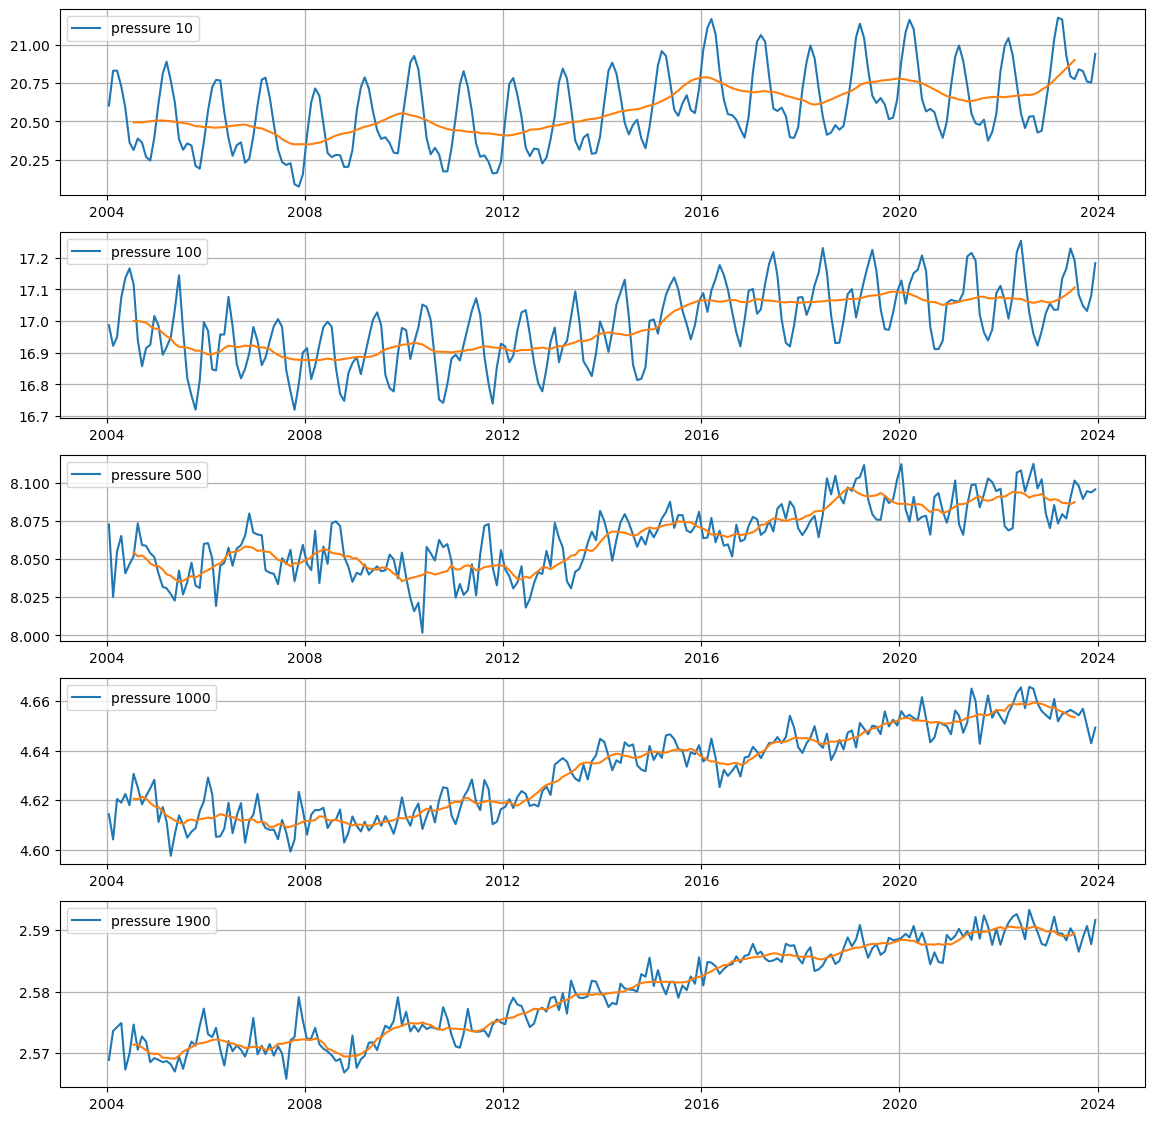

In [9]:
fig, ax = plt.subplots(5 , 1 , figsize = (14,14))
levels = ['10','100','500','1000','1900']
i1=0
for ipre in levels:
    ax[i1].plot(RG.time,RG_temp_wmean.sel(pre=ipre),label=('pressure ' + ipre ))
    ax[i1].plot(RG.time,RG_temp_wmean_rolling.sel(pre=ipre))
    ax[i1].grid(linestyle='-', linewidth=.9)
    #ax[i1].xaxis.set_tick_params(labelbottom=False)
    ax[i1].legend();
    i1=i1+1



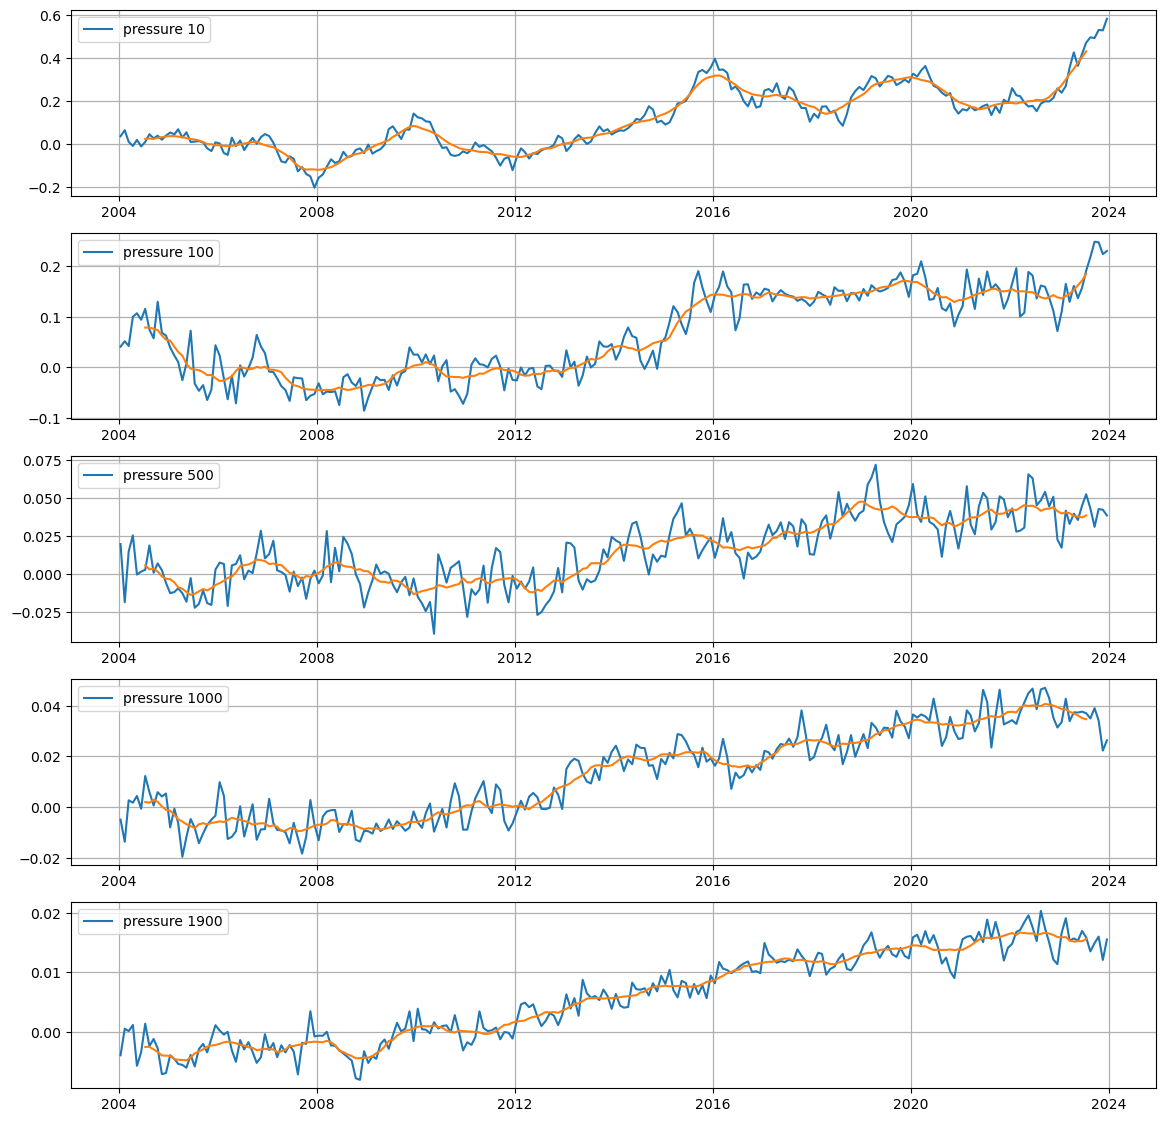

In [11]:
fig, ax = plt.subplots(5 , 1 , figsize = (14,14))
levels = ['10','100','500','1000','1900']
i1=0
for ipre in levels:
    ax[i1].plot(RG.time,RG_temp_anom_wmean.sel(pre=ipre),label=('pressure ' + ipre ))
    ax[i1].plot(RG.time,RG_temp_anom_wmean_rolling.sel(pre=ipre))
    ax[i1].grid(linestyle='-', linewidth=.9)
    #ax[i1].xaxis.set_tick_params(labelbottom=False)
    ax[i1].legend();
    i1=i1+1